In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
pd.set_option('display.max_columns', 50)

# Spotify Dataset EDA

In [3]:
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [4]:
df.head()

uris               names artist_names  \
0  3rUGC1vUpkDG9CZFHMur1t              greedy   Tate McRae   
1  31MNHKE86sEXzIglbGQ6mu      Got Me Started  Troye Sivan   
2  5aIVCx5tnk0ntmdiinnYvw               Water         Tyla   
3  59NraMJsLaMCVtwXTSia8i               Prada        cassö   
4  7DlZH8EiVDgQXNoj3dnyZC  Paint The Town Red     Doja Cat   

              artist_uris  artist_pop                           artist_genres  \
0  45dkTj5sMRSjrmBSBeiHym          82                        ['alt z', 'pop']   
1  3WGpXCj9YhhfX11TToZcXP          80  ['australian pop', 'pop', 'viral pop']   
2  3SozjO3Lat463tQICI9LcE          73                                      []   
3  5wCmhq5J2hPwL2r0eKurxn          74                                      []   
4  5cj0lLjcoR7YOSnhnX0Po5          89                    ['dance pop', 'pop']   

                         albums  track_pop  danceability  energy  keys  \
0                        greedy         99         0.750   0.733     6   
1  Something To Give Each Other         80         0.777   0.686     7   
2                         Water         94         0.673   0.722     3   
3                         Prada         94         0.638   0.717     8   
4                       Scarlet         83         0.864   0.556     2   

   loudness  modes  speechiness  acousticness  instrumentalness  liveness  \
0    -3.180      0       0.0319        0.2560          0.000000     0.114   
1    -6.498      0       0.0308        0.2230          0.001480     0.318   
2    -3.495      0       0.0755        0.0856          0.000000     0.137   
3    -5.804      1       0.0375        0.0010          0.000002     0.113   
4    -7.683      0       0.1940        0.2550          0.000004     0.112   

   valences   tempos           types                     ids  \
0     0.844  111.018  audio_features  3rUGC1vUpkDG9CZFHMur1t   
1     0.582  127.002  audio_features  31MNHKE86sEXzIglbGQ6mu   
2     0.519  117.187  audio_features  5aIVCx5tnk0ntmdiinnYvw   
3     0.422  141.904  audio_features  59NraMJsLaMCVtwXTSia8i   
4     0.726   99.974  audio_features  7DlZH8EiVDgQXNoj3dnyZC   

                                         track_hrefs  \
0  https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...   
1  https://api.spotify.com/v1/tracks/31MNHKE86sEX...   
2  https://api.spotify.com/v1/tracks/5aIVCx5tnk0n...   
3  https://api.spotify.com/v1/tracks/59NraMJsLaMC...   
4  https://api.spotify.com/v1/tracks/7DlZH8EiVDgQ...   

                                       analysis_urls  durations_ms  \
0  https://api.spotify.com/v1/audio-analysis/3rUG...        131872   
1  https://api.spotify.com/v1/audio-analysis/31MN...        198448   
2  https://api.spotify.com/v1/audio-analysis/5aIV...        200256   
3  https://api.spotify.com/v1/audio-analysis/59Nr...        132359   
4  https://api.spotify.com/v1/audio-analysis/7DlZ...        230480   

   time_signatures       playlist_name  
0                1  Hot Hits Australia  
1                4  Hot Hits Australia  
2                4  Hot Hits Australia  
3                4  Hot Hits Australia  
4                4  Hot Hits Australia

In [5]:
df.shape

(4927, 26)

In [6]:
df.columns

Index(['uris', 'names', 'artist_names', 'artist_uris', 'artist_pop',
       'artist_genres', 'albums', 'track_pop', 'danceability', 'energy',
       'keys', 'loudness', 'modes', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'types', 'ids',
       'track_hrefs', 'analysis_urls', 'durations_ms', 'time_signatures',
       'playlist_name'],
      dtype='object')

## Remove Uneccessary Columns

In [7]:
def select_columns(df):
    df =  df[['uris', 'artist_pop',
       'artist_genres', 'track_pop', 'danceability', 'energy',
       'keys', 'loudness', 'modes', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'durations_ms', 'time_signatures']]
    return df
    
df = select_columns(df)

In [8]:
df.head()

uris  artist_pop                           artist_genres  \
0  3rUGC1vUpkDG9CZFHMur1t          82                        ['alt z', 'pop']   
1  31MNHKE86sEXzIglbGQ6mu          80  ['australian pop', 'pop', 'viral pop']   
2  5aIVCx5tnk0ntmdiinnYvw          73                                      []   
3  59NraMJsLaMCVtwXTSia8i          74                                      []   
4  7DlZH8EiVDgQXNoj3dnyZC          89                    ['dance pop', 'pop']   

   track_pop  danceability  energy  keys  loudness  modes  speechiness  \
0         99         0.750   0.733     6    -3.180      0       0.0319   
1         80         0.777   0.686     7    -6.498      0       0.0308   
2         94         0.673   0.722     3    -3.495      0       0.0755   
3         94         0.638   0.717     8    -5.804      1       0.0375   
4         83         0.864   0.556     2    -7.683      0       0.1940   

   acousticness  instrumentalness  liveness  valences   tempos  durations_ms  \
0        0.2560          0.000000     0.114     0.844  111.018        131872   
1        0.2230          0.001480     0.318     0.582  127.002        198448   
2        0.0856          0.000000     0.137     0.519  117.187        200256   
3        0.0010          0.000002     0.113     0.422  141.904        132359   
4        0.2550          0.000004     0.112     0.726   99.974        230480   

   time_signatures  
0                1  
1                4  
2                4  
3                4  
4                4

## Basic EDA and Visualizations

In [9]:
df.describe()

artist_pop    track_pop  danceability       energy         keys  \
count  4927.000000  4927.000000   4927.000000  4927.000000  4927.000000   
mean     64.682160    68.539679      0.578407     0.547602     5.087680   
std      16.715577    13.188890      0.210457     0.285745     3.598566   
min       5.000000     1.000000      0.056500     0.000062     0.000000   
25%      51.000000    61.000000      0.462000     0.398000     2.000000   
50%      65.000000    70.000000      0.616000     0.614000     5.000000   
75%      77.000000    79.000000      0.733000     0.763000     8.000000   
max     100.000000   100.000000      0.975000     0.997000    11.000000   

          loudness        modes  speechiness  acousticness  instrumentalness  \
count  4927.000000  4927.000000  4927.000000   4927.000000       4927.000000   
mean    -11.168334     0.675259     0.091620      0.349179          0.173067   
std      10.367999     0.468326     0.095192      0.357702          0.342054   
min     -50.060000     0.000000     0.022700      0.000002          0.000000   
25%     -10.513000     0.000000     0.037900      0.041900          0.000000   
50%      -7.097000     1.000000     0.049500      0.189000          0.000017   
75%      -5.274500     1.000000     0.096500      0.637000          0.024600   
max       1.508000     1.000000     0.880000      0.996000          0.991000   

          liveness     valences       tempos   durations_ms  time_signatures  
count  4927.000000  4927.000000  4927.000000    4927.000000      4927.000000  
mean      0.164072     0.448914   116.564510  203365.468642         3.894053  
std       0.125258     0.259810    29.429946   58541.794656         0.489992  
min       0.021200     0.000000    31.237000   50765.000000         1.000000  
25%       0.095000     0.227000    94.464000  165491.000000         4.000000  
50%       0.114000     0.437000   118.925000  195906.000000         4.000000  
75%       0.188000     0.654000   135.611000  231867.000000         4.000000  
max       0.970000     0.978000   217.969000  812625.000000         5.000000

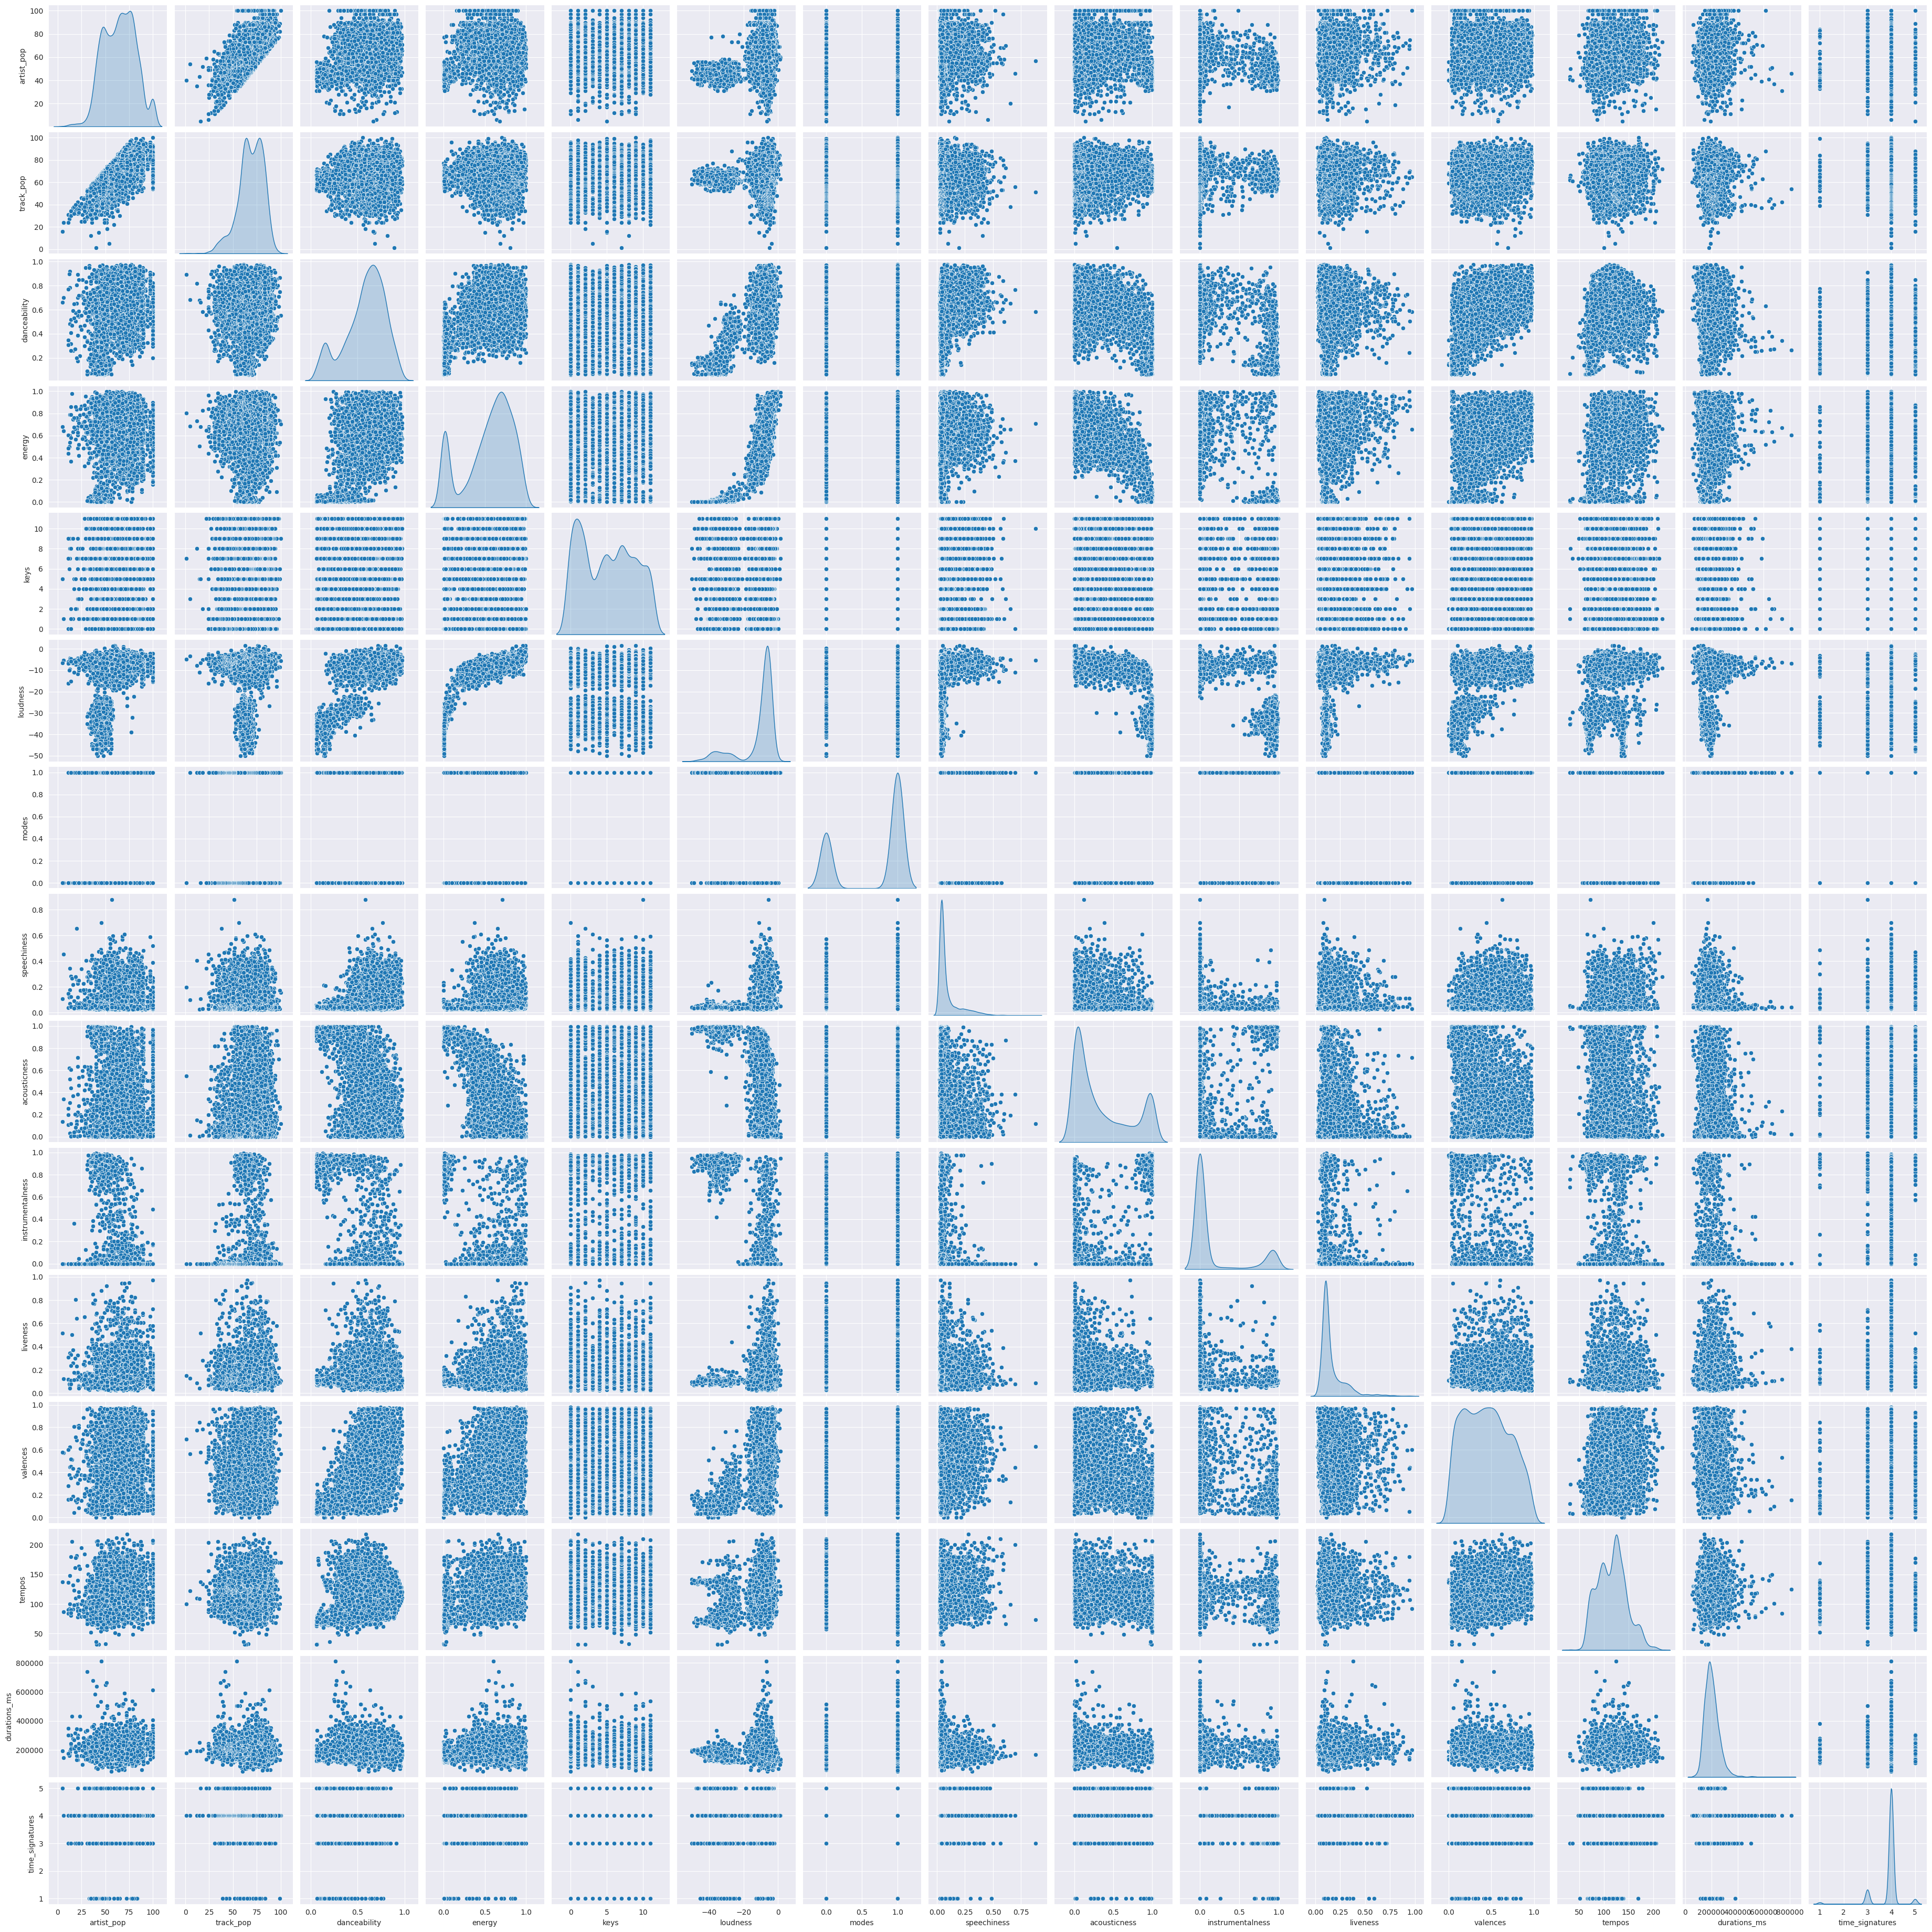

In [10]:
sns.pairplot(df, diag_kind='kde')
plt.show()

## Feature Creation

### One Hot Encoding

In [11]:
def ohe_prep(df, column):
    df_encoded = pd.get_dummies(df, columns=[column], dtype=int) 
    return df_encoded

In [12]:
df_test = ohe_prep(df, 'modes')

In [13]:
df_test.columns

Index(['uris', 'artist_pop', 'artist_genres', 'track_pop', 'danceability',
       'energy', 'keys', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'durations_ms',
       'time_signatures', 'modes_0', 'modes_1'],
      dtype='object')

In [14]:
df_test['modes_0']

0       1
1       1
2       1
3       0
4       1
       ..
4922    0
4923    1
4924    1
4925    1
4926    1
Name: modes_0, Length: 4927, dtype: int64

### Normalize Popularity Values

In [15]:
scaler = MinMaxScaler()
df[['artist_pop', 'track_pop']] = scaler.fit_transform(df[['artist_pop', 'track_pop']])

### TFID Transformation

In [16]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 1),min_df=0.0)
tfidf_matrix = tf.fit_transform(df['artist_genres'])

In [17]:
len(tf.vocabulary_)

552

In [18]:
tfidf_matrix.shape

(4927, 552)

In [19]:
genre_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names_out())

In [20]:
genre_df.columns = ['genre' + "|" + i for i in genre_df.columns]

In [21]:
genre_df.head()

genre|528hz  genre|abstract  genre|acid  genre|acoustic  genre|adult  \
0          0.0             0.0         0.0             0.0          0.0   
1          0.0             0.0         0.0             0.0          0.0   
2          0.0             0.0         0.0             0.0          0.0   
3          0.0             0.0         0.0             0.0          0.0   
4          0.0             0.0         0.0             0.0          0.0   

   genre|advocacy  genre|aesthetic  genre|african  genre|afro  genre|afrobeat  \
0             0.0              0.0            0.0         0.0             0.0   
1             0.0              0.0            0.0         0.0             0.0   
2             0.0              0.0            0.0         0.0             0.0   
3             0.0              0.0            0.0         0.0             0.0   
4             0.0              0.0            0.0         0.0             0.0   

   genre|afrobeats  genre|afrofuturism  genre|afropop  genre|afroswing  \
0              0.0                 0.0            0.0              0.0   
1              0.0                 0.0            0.0              0.0   
2              0.0                 0.0            0.0              0.0   
3              0.0                 0.0            0.0              0.0   
4              0.0                 0.0            0.0              0.0   

   genre|age  genre|aggressive  genre|alabama  genre|alberta  genre|album  \
0        0.0               0.0            0.0            0.0          0.0   
1        0.0               0.0            0.0            0.0          0.0   
2        0.0               0.0            0.0            0.0          0.0   
3        0.0               0.0            0.0            0.0          0.0   
4        0.0               0.0            0.0            0.0          0.0   

   genre|alt  genre|alte  genre|alternative  genre|ambient  genre|american  \
0   0.937881         0.0                0.0            0.0             0.0   
1   0.000000         0.0                0.0            0.0             0.0   
2   0.000000         0.0                0.0            0.0             0.0   
3   0.000000         0.0                0.0            0.0             0.0   
4   0.000000         0.0                0.0            0.0             0.0   

   genre|americana  ...  genre|vallenato  genre|vapor  genre|vaporwave  \
0              0.0  ...              0.0          0.0              0.0   
1              0.0  ...              0.0          0.0              0.0   
2              0.0  ...              0.0          0.0              0.0   
3              0.0  ...              0.0          0.0              0.0   
4              0.0  ...              0.0          0.0              0.0   

   genre|venezolano  genre|video  genre|vincy  genre|vintage  genre|viral  \
0               0.0          0.0          0.0            0.0     0.000000   
1               0.0          0.0          0.0            0.0     0.620248   
2               0.0          0.0          0.0            0.0     0.000000   
3               0.0          0.0          0.0            0.0     0.000000   
4               0.0          0.0          0.0            0.0     0.000000   

   genre|virginia  genre|vocal  genre|wave  genre|weirdcore  genre|west  \
0             0.0          0.0         0.0              0.0         0.0   
1             0.0          0.0         0.0              0.0         0.0   
2             0.0          0.0         0.0              0.0         0.0   
3             0.0          0.0         0.0              0.0         0.0   
4             0.0          0.0         0.0              0.0         0.0   

   genre|westcoast  genre|western  genre|women  genre|wonky  genre|world  \
0              0.0            0.0          0.0          0.0          0.0   
1              0.0            0.0          0.0          0.0          0.0   
2              0.0            0.0          0.0          0.0          0.0   
3              0.0       

In [22]:
genre_df.describe()

genre|528hz  genre|abstract   genre|acid  genre|acoustic  genre|adult  \
count  4927.000000     4927.000000  4927.000000     4927.000000  4927.000000   
mean      0.000609        0.000107     0.000427        0.000514     0.002649   
std       0.024671        0.007517     0.011417        0.016565     0.032283   
min       0.000000        0.000000     0.000000        0.000000     0.000000   
25%       0.000000        0.000000     0.000000        0.000000     0.000000   
50%       0.000000        0.000000     0.000000        0.000000     0.000000   
75%       0.000000        0.000000     0.000000        0.000000     0.000000   
max       1.000000        0.527668     0.341472        0.635069     0.505419   

       genre|advocacy  genre|aesthetic  genre|african   genre|afro  \
count     4927.000000      4927.000000    4927.000000  4927.000000   
mean         0.000144         0.000378       0.000521     0.000503   
std          0.010074         0.018774       0.018564     0.016509   
min          0.000000         0.000000       0.000000     0.000000   
25%          0.000000         0.000000       0.000000     0.000000   
50%          0.000000         0.000000       0.000000     0.000000   
75%          0.000000         0.000000       0.000000     0.000000   
max          0.707107         0.931930       0.741695     0.766635   

       genre|afrobeat  genre|afrobeats  genre|afrofuturism  genre|afropop  \
count     4927.000000      4927.000000         4927.000000    4927.000000   
mean         0.000155         0.002107            0.002285       0.000313   
std          0.010894         0.036314            0.042927       0.012902   
min          0.000000         0.000000            0.000000       0.000000   
25%          0.000000         0.000000            0.000000       0.000000   
50%          0.000000         0.000000            0.000000       0.000000   
75%          0.000000         0.000000            0.000000       0.000000   
max          0.764711         1.000000            1.000000       0.646450   

       genre|afroswing    genre|age  genre|aggressive  genre|alabama  \
count      4927.000000  4927.000000       4927.000000    4927.000000   
mean          0.001092     0.000452          0.000166       0.000305   
std           0.029529     0.014362          0.008218       0.015377   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       0.000000   
50%           0.000000     0.000000          0.000000       0.000000   
75%           0.000000     0.000000          0.000000       0.000000   
max           1.000000     0.753479          0.407934       0.887610   

       genre|alberta  genre|album    genre|alt   genre|alte  \
count    4927.000000  4927.000000  4927.000000  4927.000000   
mean        0.000147     0.007705     0.008963     0.000131   
std         0.007534     0.041759     0.081831     0.009175   
min         0.000000     0.000000     0.000000     0.000000   
25%         0.000000     0.000000     0.000000     0.000000   
50%         0.000000     0.000000     0.000000     0.000000   
75%         0.000000     0.000000     0.000000     0.000000   
max         0.454498     0.487231     1.000000     0.644013   

       genre|alternative  genre|ambient  genre|american  genre|americana  ...  \
count        4927.000000    4927.000000     4927.000000      4927.000000  ...   
mean            0.015179       0.000512        0.000284         0.000827  ...   
std             0.089403       0.016280        0.011546         0.022609  ...   
min             0.000000       0.000000        0.000000         0.000000  ...   
25%             0.000000       0.000000        0.000000         0.000000  ...   
50%             0.000000       0.000000        0.000000         0.000000  ...   
75%             0.000000       0.000000        0.000000         0.000000  ...   
max             1.000000       0.612982        0.497251         0.923090  ...   

       genre|v

In [23]:
genre_df.columns

Index(['genre|528hz', 'genre|abstract', 'genre|acid', 'genre|acoustic',
       'genre|adult', 'genre|advocacy', 'genre|aesthetic', 'genre|african',
       'genre|afro', 'genre|afrobeat',
       ...
       'genre|women', 'genre|wonky', 'genre|world', 'genre|worship',
       'genre|yacht', 'genre|ye', 'genre|yodeling', 'genre|york',
       'genre|zambian', 'genre|zolo'],
      dtype='object', length=552)

In [24]:
def tfidf_transformation(df, tf=None):
    if tf is None:
        tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 1),min_df=0.0)
        tfidf_matrix = tf.fit_transform(df['artist_genres'])
    else:
        tfidf_matrix = tf.transform(df['artist_genres'])
        
    genre_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names_out())
    genre_df.columns = ['genre' + "|" + i for i in genre_df.columns]

    df = df.drop(columns=['artist_genres'])

    df = pd.concat([df.reset_index(drop=True), genre_df.reset_index(drop=True)], axis=1)  # Reset index to avoid rows being added due to index in memory
    return df, tf

In [25]:
df, tf = tfidf_transformation(df)

In [26]:
df.describe()

artist_pop    track_pop  danceability       energy         keys  \
count  4927.000000  4927.000000   4927.000000  4927.000000  4927.000000   
mean      0.628233     0.682219      0.578407     0.547602     5.087680   
std       0.175953     0.133221      0.210457     0.285745     3.598566   
min       0.000000     0.000000      0.056500     0.000062     0.000000   
25%       0.484211     0.606061      0.462000     0.398000     2.000000   
50%       0.631579     0.696970      0.616000     0.614000     5.000000   
75%       0.757895     0.787879      0.733000     0.763000     8.000000   
max       1.000000     1.000000      0.975000     0.997000    11.000000   

          loudness        modes  speechiness  acousticness  instrumentalness  \
count  4927.000000  4927.000000  4927.000000   4927.000000       4927.000000   
mean    -11.168334     0.675259     0.091620      0.349179          0.173067   
std      10.367999     0.468326     0.095192      0.357702          0.342054   
min     -50.060000     0.000000     0.022700      0.000002          0.000000   
25%     -10.513000     0.000000     0.037900      0.041900          0.000000   
50%      -7.097000     1.000000     0.049500      0.189000          0.000017   
75%      -5.274500     1.000000     0.096500      0.637000          0.024600   
max       1.508000     1.000000     0.880000      0.996000          0.991000   

          liveness     valences       tempos   durations_ms  time_signatures  \
count  4927.000000  4927.000000  4927.000000    4927.000000      4927.000000   
mean      0.164072     0.448914   116.564510  203365.468642         3.894053   
std       0.125258     0.259810    29.429946   58541.794656         0.489992   
min       0.021200     0.000000    31.237000   50765.000000         1.000000   
25%       0.095000     0.227000    94.464000  165491.000000         4.000000   
50%       0.114000     0.437000   118.925000  195906.000000         4.000000   
75%       0.188000     0.654000   135.611000  231867.000000         4.000000   
max       0.970000     0.978000   217.969000  812625.000000         5.000000   

       genre|528hz  genre|abstract   genre|acid  genre|acoustic  genre|adult  \
count  4927.000000     4927.000000  4927.000000     4927.000000  4927.000000   
mean      0.000609        0.000107     0.000427        0.000514     0.002649   
std       0.024671        0.007517     0.011417        0.016565     0.032283   
min       0.000000        0.000000     0.000000        0.000000     0.000000   
25%       0.000000        0.000000     0.000000        0.000000     0.000000   
50%       0.000000        0.000000     0.000000        0.000000     0.000000   
75%       0.000000        0.000000     0.000000        0.000000     0.000000   
max       1.000000        0.527668     0.341472        0.635069     0.505419   

       genre|advocacy  genre|aesthetic  genre|african   genre|afro  \
count     4927.000000      4927.000000    4927.000000  4927.000000   
mean         0.000144         0.000378       0.000521     0.000503   
std          0.010074         0.018774       0.018564     0.016509   
min          0.000000         0.000000       0.000000     0.000000   
25%          0.000000         0.000000       0.000000     0.000000   
50%          0.000000         0.000000       0.000000     0.000000   
75%          0.000000         0.000000       0.000000     0.000000   
max          0.707107         0.931930       0.741695     0.766635   

       genre|afrobeat  ...  genre|vallenato  genre|vapor  genre|vaporwave  \
count     4927.000000  ...      4927.000000  4927.000000      4927.000000   
mean         0.000155  ...         0.000138     0.001497         0.000203   
std          0.010894  ...         0.009655     0.028176         0.014247   
min          0.000000  ...         0.000000     0.000000         0.000000   
25%          0.000000  ...         0.000000     0.000000         0.000000   
50%          0.000000  ...         0.000000     0.000000         0.000000   

## Pipeline

In [27]:
def data_pipeline(df, tf=None):
    # Select only the necessary columns
    df = select_columns(df)

    # Perfrom OHE
    df = ohe_prep(df, 'modes')
    df = ohe_prep(df, 'keys')
    df = ohe_prep(df, 'time_signatures')

    # Normalize popularity values
    scaler = MinMaxScaler()
    df[['artist_pop', 'track_pop', 'durations_ms']] = scaler.fit_transform(df[['artist_pop', 'track_pop', 'durations_ms']])

    # Perform TFID vectorization on genres
    df, tf = tfidf_transformation(df, tf)

    df = df.set_index(keys='uris', drop=True)

    return df, tf

## Pipeline in Action

In [28]:
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [29]:
df, tf = data_pipeline(df)

In [30]:
df.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
3rUGC1vUpkDG9CZFHMur1t    0.810526   0.989899         0.750   0.733    -3.180   
31MNHKE86sEXzIglbGQ6mu    0.789474   0.797980         0.777   0.686    -6.498   
5aIVCx5tnk0ntmdiinnYvw    0.715789   0.939394         0.673   0.722    -3.495   
59NraMJsLaMCVtwXTSia8i    0.726316   0.939394         0.638   0.717    -5.804   
7DlZH8EiVDgQXNoj3dnyZC    0.884211   0.828283         0.864   0.556    -7.683   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
3rUGC1vUpkDG9CZFHMur1t       0.0319        0.2560          0.000000     0.114   
31MNHKE86sEXzIglbGQ6mu       0.0308        0.2230          0.001480     0.318   
5aIVCx5tnk0ntmdiinnYvw       0.0755        0.0856          0.000000     0.137   
59NraMJsLaMCVtwXTSia8i       0.0375        0.0010          0.000002     0.113   
7DlZH8EiVDgQXNoj3dnyZC       0.1940        0.2550          0.000004     0.112   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
3rUGC1vUpkDG9CZFHMur1t     0.844  111.018      0.106459        1        0   
31MNHKE86sEXzIglbGQ6mu     0.582  127.002      0.193845        1        0   
5aIVCx5tnk0ntmdiinnYvw     0.519  117.187      0.196218        1        0   
59NraMJsLaMCVtwXTSia8i     0.422  141.904      0.107098        0        1   
7DlZH8EiVDgQXNoj3dnyZC     0.726   99.974      0.235890        1        0   

                        keys_0  keys_1  keys_2  keys_3  keys_4  keys_5  \
uris                                                                     
3rUGC1vUpkDG9CZFHMur1t       0       0       0       0       0       0   
31MNHKE86sEXzIglbGQ6mu       0       0       0       0       0       0   
5aIVCx5tnk0ntmdiinnYvw       0       0       0       1       0       0   
59NraMJsLaMCVtwXTSia8i       0       0       0       0       0       0   
7DlZH8EiVDgQXNoj3dnyZC       0       0       1       0       0       0   

                        keys_6  keys_7  keys_8  keys_9  keys_10  ...  \
uris                                                             ...   
3rUGC1vUpkDG9CZFHMur1t       1       0       0       0        0  ...   
31MNHKE86sEXzIglbGQ6mu       0       1       0       0        0  ...   
5aIVCx5tnk0ntmdiinnYvw       0       0       0       0        0  ...   
59NraMJsLaMCVtwXTSia8i       0       0       1       0        0  ...   
7DlZH8EiVDgQXNoj3dnyZC       0       0       0       0        0  ...   

                        genre|vallenato  genre|vapor  genre|vaporwave  \
uris                                                                    
3rUGC1vUpkDG9CZFHMur1t              0.0          0.0              0.0   
31MNHKE86sEXzIglbGQ6mu              0.0          0.0              0.0   
5aIVCx5tnk0ntmdiinnYvw              0.0          0.0              0.0   
59NraMJsLaMCVtwXTSia8i              0.0          0.0              0.0   
7DlZH8EiVDgQXNoj3dnyZC              0.0          0.0              0.0   

                        genre|venezolano  genre|video  genre|vincy  \
uris                                                                 
3rUGC1vUpkDG9CZFHMur1t               0.0          0.0          0.0   
31MNHKE86sEXzIglbGQ6mu               0.0          0.0          0.0   
5aIVCx5tnk0ntmdiinnYvw               0.0          0.0          0.0   
59NraMJsLaMCVtwXTSia8i               0.0          0.0          0.0   
7DlZH8EiVDgQXNoj3dnyZC               0.0          0.0          0.0   

                        genre|vintage  genre|viral  genre|virginia  \
uris                                                                 
3rUGC1vUpkDG9CZFHMur1t            0.0     0.000000             0.0   
31MNHKE86sEXzIglbGQ6mu            0.0     0.620248             0.0   
5aIVCx5tnk0ntmdiinnYvw            0.0    

In [31]:
df.shape

(4927, 582)

In [33]:
assert(df.shape[0] == 4927)

## Create Target Playlist Summary Vector (Depreciated)

If the pipeline processes the dataset and the target playlist separately, there will exist a discrepancy in vector sizes. 
Below is an attempt to use two separate pipeline processes. However, this results in differing vector sizes due to the OHE.
The correct process will be in the following section

In [34]:
df_target = pd.read_csv('../data/target.csv', index_col=0)
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [35]:
df_target.shape

(34, 26)

Perform simple EDA for visual comparison against all tracks collected

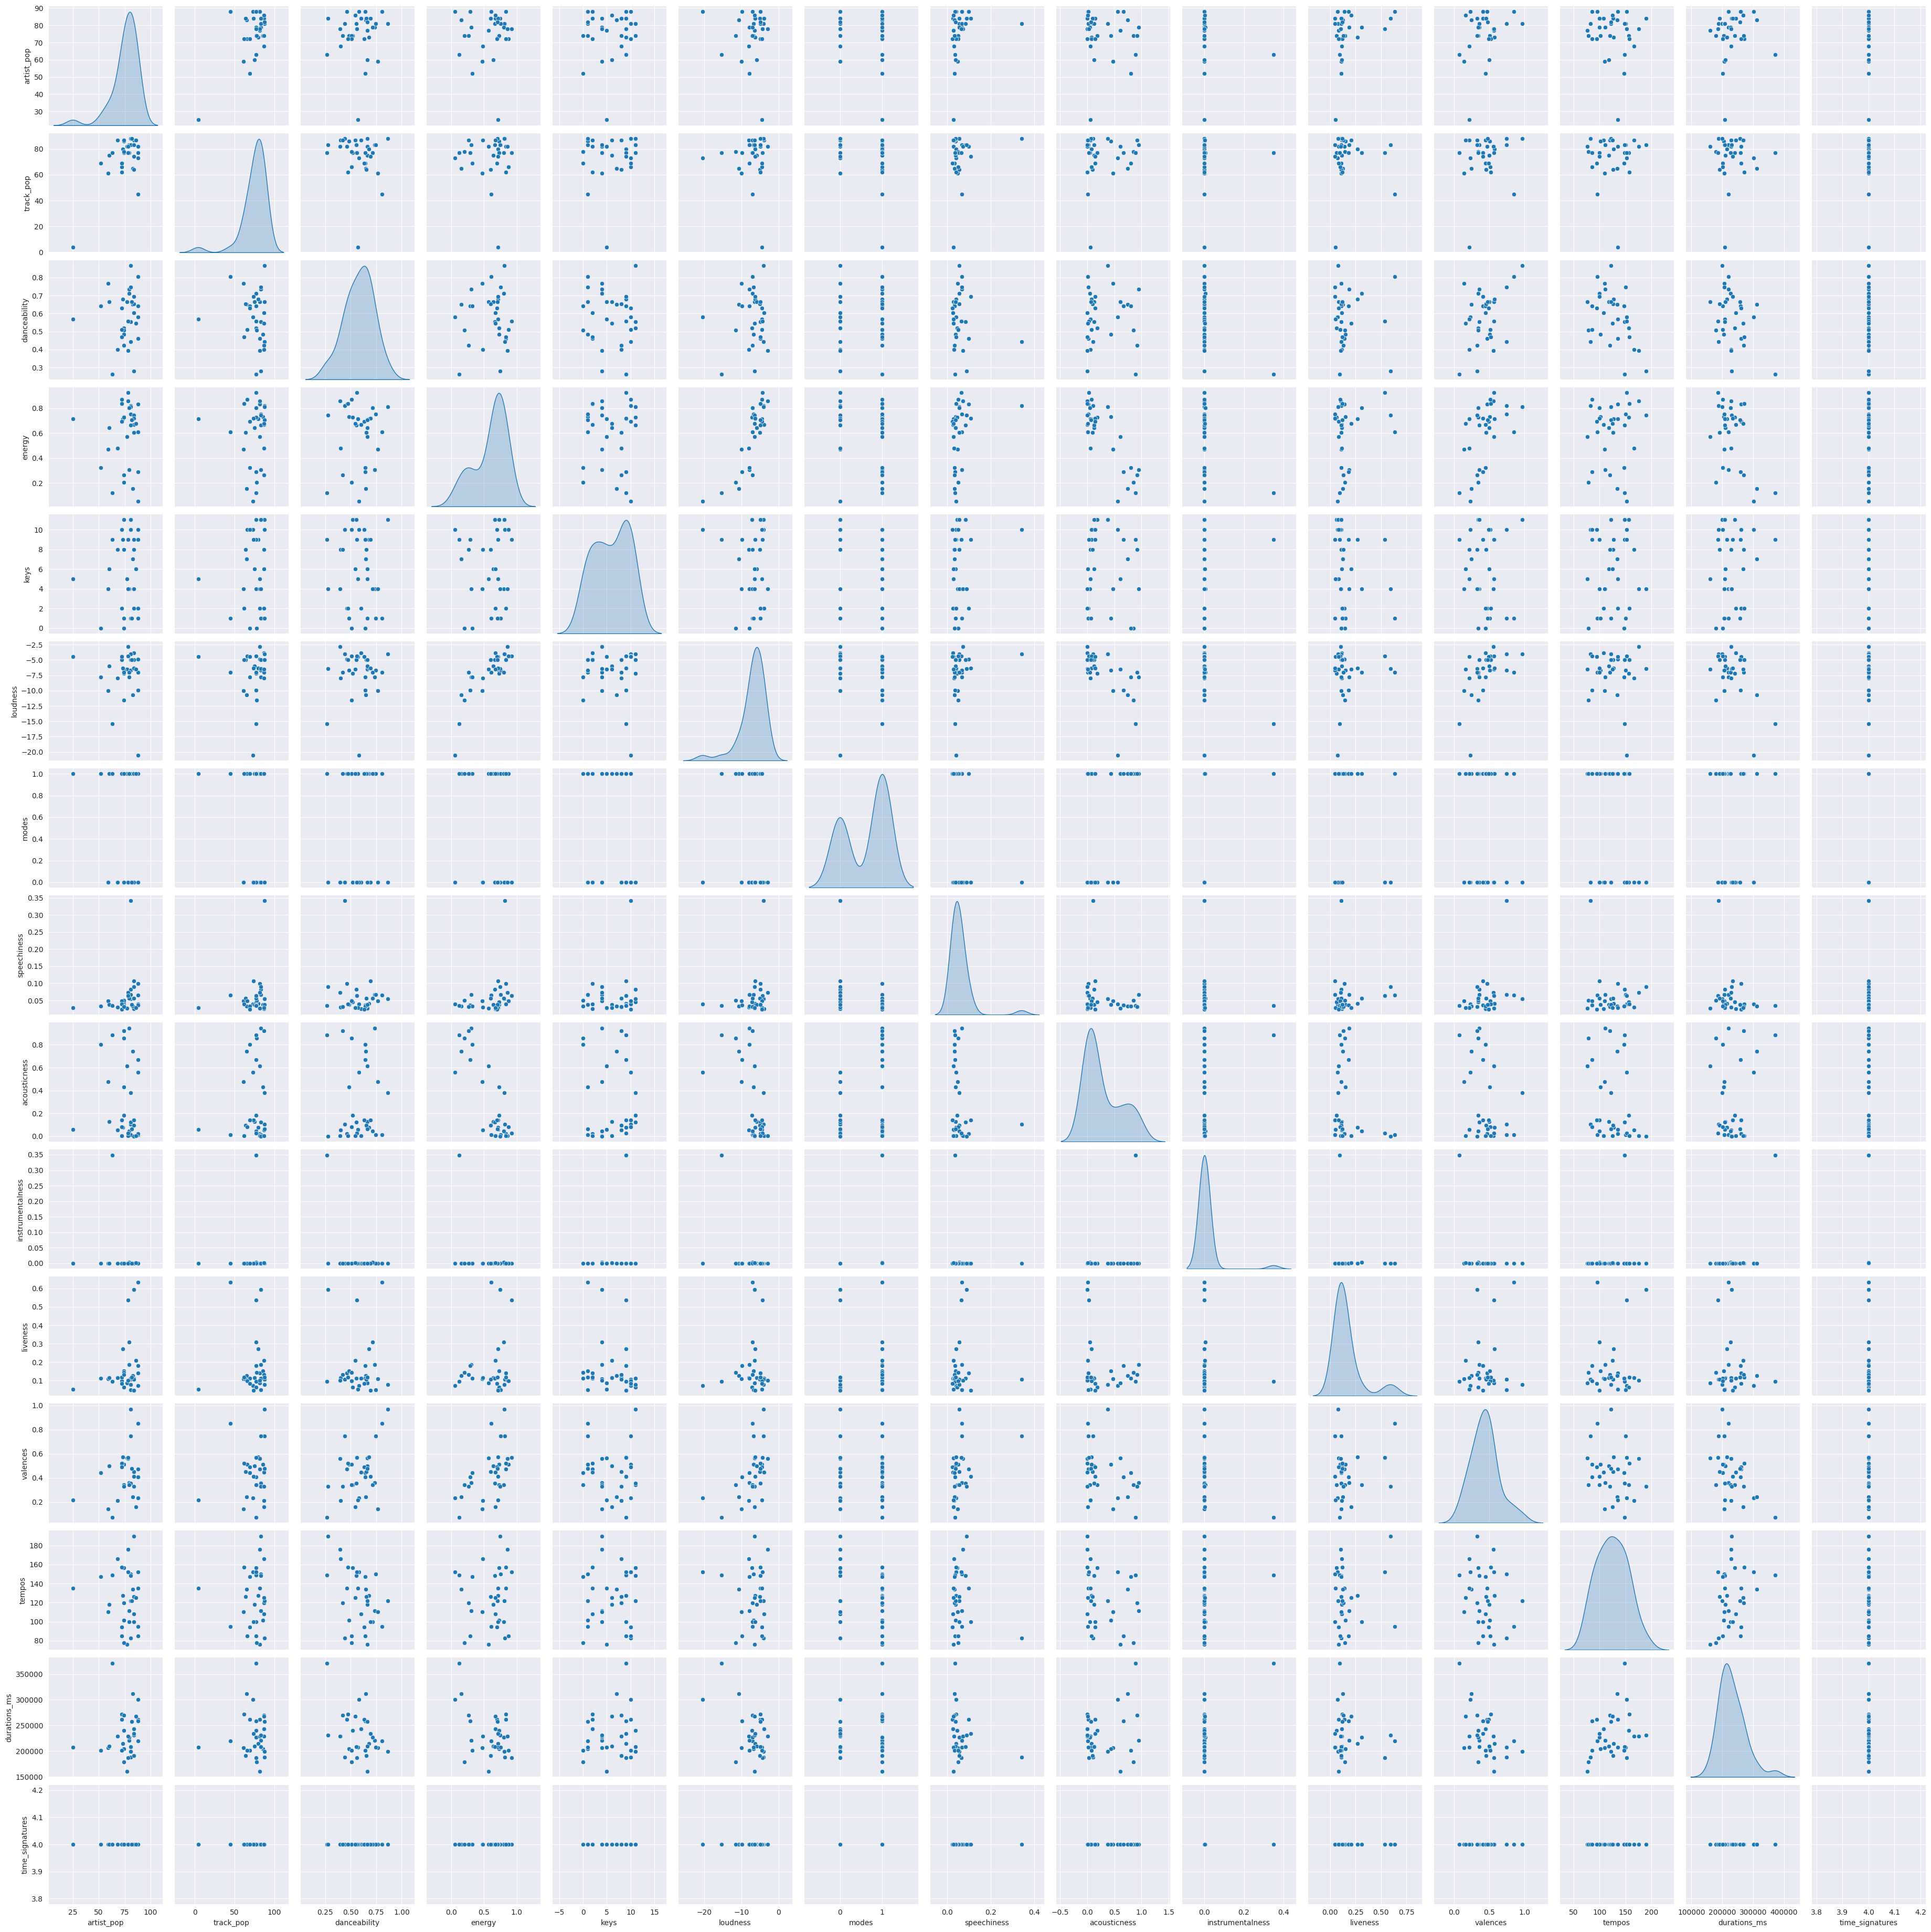

In [36]:
sns.pairplot(df_target, diag_kind='kde')
plt.show()

In [37]:
df_target.describe()

artist_pop  track_pop  danceability     energy       keys   loudness  \
count   34.000000  34.000000     34.000000  34.000000  34.000000  34.000000   
mean    75.470588  74.882353      0.581794   0.598997   5.911765  -7.030559   
std     12.507538  15.902667      0.140948   0.241653   3.646232   3.489547   
min     25.000000   4.000000      0.264000   0.054900   0.000000 -20.514000   
25%     72.250000  70.000000      0.489750   0.473000   2.500000  -7.661000   
50%     78.500000  77.500000      0.592000   0.684500   6.000000  -6.467000   
75%     83.750000  83.000000      0.664000   0.751000   9.000000  -4.889000   
max     88.000000  88.000000      0.866000   0.924000  11.000000  -2.868000   

           modes  speechiness  acousticness  instrumentalness   liveness  \
count  34.000000    34.000000     34.000000         34.000000  34.000000   
mean    0.617647     0.058471      0.284441          0.010449   0.163503   
std     0.493270     0.054306      0.327722          0.059825   0.145838   
min     0.000000     0.024200      0.000185          0.000000   0.046400   
25%     0.000000     0.034075      0.031200          0.000000   0.094875   
50%     1.000000     0.042950      0.115500          0.000000   0.113000   
75%     1.000000     0.065425      0.538250          0.000001   0.149000   
max     1.000000     0.341000      0.946000          0.349000   0.635000   

        valences      tempos   durations_ms  time_signatures  
count  34.000000   34.000000      34.000000             34.0  
mean    0.438544  124.538059  231425.000000              4.0  
std     0.196420   29.422301   42303.823942              0.0  
min     0.073500   76.023000  160097.000000              4.0  
25%     0.334000  100.414250  204751.750000              4.0  
50%     0.445000  123.493000  223615.500000              4.0  
75%     0.519250  148.525500  258096.500000              4.0  
max     0.969000  189.868000  371320.000000              4.0

### Create Target Features

In [38]:
df, tf = data_pipeline(df)
df_target, tf = data_pipeline(df_target, tf)

In [39]:
df_target.shape

(34, 578)

In [40]:
df.shape

(4927, 582)

In [41]:
df_target.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha    1.000000   0.488095         0.806  0.6080    -7.008   
6PCUP3dWmTjcTtXY02oFdT    1.000000   0.928571         0.461  0.8340    -4.868   
3di5hcvxxciiqwMH1jarhY    0.936508   0.988095         0.603  0.6700    -3.882   
3B7udSGy2PfgoCniMSb523    1.000000   0.821429         0.581  0.0549   -20.514   
5NORWMFC27ywGSZxi8uquP    0.825397   0.928571         0.664  0.5730    -6.519   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha       0.0659       0.01130          0.000000    0.6350   
6PCUP3dWmTjcTtXY02oFdT       0.0989       0.02320          0.000011    0.1400   
3di5hcvxxciiqwMH1jarhY       0.0249       0.00408          0.000002    0.1120   
3B7udSGy2PfgoCniMSb523       0.0397       0.55900          0.000000    0.0718   
5NORWMFC27ywGSZxi8uquP       0.0277       0.61300          0.000363    0.0857   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
5LTzAKRZ2Xct8d6vVrErha     0.849   95.049      0.282843        0        1   
6PCUP3dWmTjcTtXY02oFdT     0.471  135.007      0.478437        0        1   
3di5hcvxxciiqwMH1jarhY     0.446  107.993      0.392367        1        0   
3B7udSGy2PfgoCniMSb523     0.234  152.037      0.666324        1        0   
5NORWMFC27ywGSZxi8uquP     0.566   76.023      0.000000        0        1   

                        keys_0  keys_1  keys_2  keys_4  keys_5  keys_6  \
uris                                                                     
5LTzAKRZ2Xct8d6vVrErha       0       1       0       0       0       0   
6PCUP3dWmTjcTtXY02oFdT       0       0       1       0       0       0   
3di5hcvxxciiqwMH1jarhY       0       0       1       0       0       0   
3B7udSGy2PfgoCniMSb523       0       0       0       0       0       0   
5NORWMFC27ywGSZxi8uquP       0       0       0       0       1       0   

                        keys_7  keys_8  keys_9  keys_10  keys_11  ...  \
uris                                                              ...   
5LTzAKRZ2Xct8d6vVrErha       0       0       0        0        0  ...   
6PCUP3dWmTjcTtXY02oFdT       0       0       0        0        0  ...   
3di5hcvxxciiqwMH1jarhY       0       0       0        0        0  ...   
3B7udSGy2PfgoCniMSb523       0       0       0        1        0  ...   
5NORWMFC27ywGSZxi8uquP       0       0       0        0        0  ...   

                        genre|vallenato  genre|vapor  genre|vaporwave  \
uris                                                                    
5LTzAKRZ2Xct8d6vVrErha              0.0          0.0              0.0   
6PCUP3dWmTjcTtXY02oFdT              0.0          0.0              0.0   
3di5hcvxxciiqwMH1jarhY              0.0          0.0              0.0   
3B7udSGy2PfgoCniMSb523              0.0          0.0              0.0   
5NORWMFC27ywGSZxi8uquP              0.0          0.0              0.0   

                        genre|venezolano  genre|video  genre|vincy  \
uris                                                                 
5LTzAKRZ2Xct8d6vVrErha               0.0          0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT               0.0          0.0          0.0   
3di5hcvxxciiqwMH1jarhY               0.0          0.0          0.0   
3B7udSGy2PfgoCniMSb523               0.0          0.0          0.0   
5NORWMFC27ywGSZxi8uquP               0.0          0.0          0.0   

                        genre|vintage  genre|viral  genre|virginia  \
uris                                                                 
5LTzAKRZ2Xct8d6vVrErha            0.0          0.0             0.0   
6PCUP3dWmTjcTtXY02oFdT            0.0          0.0             0.0   
3di5hcvxxciiqwMH1jarhY            

In [42]:
dif_1 = set(df_target.columns) - set(df.columns)
print(dif_1)

dif_2 = set(df.columns) - set(df_target.columns)
print(dif_2)

set()
{'time_signatures_1', 'keys_3', 'time_signatures_3', 'time_signatures_5'}


In [43]:
df.columns

Index(['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valences',
       ...
       'genre|women', 'genre|wonky', 'genre|world', 'genre|worship',
       'genre|yacht', 'genre|ye', 'genre|yodeling', 'genre|york',
       'genre|zambian', 'genre|zolo'],
      dtype='object', length=582)

## Create Target Features

In [44]:
df_target = pd.read_csv('../data/target.csv', index_col=0)
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [45]:
dataset_complete = pd.concat([df_target, df], axis=0)
dataset_complete = dataset_complete.reset_index(drop=True)

In [46]:
dataset_complete.head()

uris                                              names  \
0  5LTzAKRZ2Xct8d6vVrErha                                              Don't   
1  6PCUP3dWmTjcTtXY02oFdT                                 Castle on the Hill   
2  3di5hcvxxciiqwMH1jarhY                               Set Fire to the Rain   
3  3B7udSGy2PfgoCniMSb523  I See Fire - From "The Hobbit - The Desolation...   
4  5NORWMFC27ywGSZxi8uquP                                            Ophelia   

    artist_names             artist_uris  artist_pop  \
0     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
1     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
2          Adele  4dpARuHxo51G3z768sgnrY          84   
3     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
4  The Lumineers  16oZKvXb6WkQlVAjwo2Wbg          77   

                                     artist_genres  \
0       ['pop', 'singer-songwriter pop', 'uk pop']   
1       ['pop', 'singer-songwriter pop', 'uk pop']   
2    ['british soul', 'pop', 'pop soul', 'uk pop']   
3       ['pop', 'singer-songwriter pop', 'uk pop']   
4  ['folk-pop', 'modern rock', 'stomp and holler']   

                                              albums  track_pop  danceability  \
0                                x (Wembley Edition)         45         0.806   
1                                         ÷ (Deluxe)         82         0.461   
2                                                 21         87         0.603   
3  The Hobbit - The Desolation Of Smaug (Original...         73         0.581   
4                                          Cleopatra         82         0.664   

   energy  keys  loudness  modes  speechiness  acousticness  instrumentalness  \
0  0.6080     1    -7.008      1       0.0659       0.01130          0.000000   
1  0.8340     2    -4.868      1       0.0989       0.02320          0.000011   
2  0.6700     2    -3.882      0       0.0249       0.00408          0.000002   
3  0.0549    10   -20.514      0       0.0397       0.55900          0.000000   
4  0.5730     5    -6.519      1       0.0277       0.61300          0.000363   

   liveness  valences   tempos           types                     ids  \
0    0.6350     0.849   95.049  audio_features  5LTzAKRZ2Xct8d6vVrErha   
1    0.1400     0.471  135.007  audio_features  6PCUP3dWmTjcTtXY02oFdT   
2    0.1120     0.446  107.993  audio_features  3di5hcvxxciiqwMH1jarhY   
3    0.0718     0.234  152.037  audio_features  3B7udSGy2PfgoCniMSb523   
4    0.0857     0.566   76.023  audio_features  5NORWMFC27ywGSZxi8uquP   

                                         track_hrefs  \
0  https://api.spotify.com/v1/tracks/5LTzAKRZ2Xct...   
1  https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...   
2  https://api.spotify.com/v1/tracks/3di5hcvxxcii...   
3  https://api.spotify.com/v1/tracks/3B7udSGy2Pfg...   
4  https://api.spotify.com/v1/tracks/5NORWMFC27yw...   

                                       analysis_urls  durations_ms  \
0  https://api.spotify.com/v1/audio-analysis/5LTz...        219840   
1  https://api.spotify.com/v1/audio-analysis/6PCU...        261154   
2  https://api.spotify.com/v1/audio-analysis/3di5...        242974   
3  https://api.spotify.com/v1/audio-analysis/3B7u...        300840   
4  https://api.spotify.com/v1/audio-analysis/5NOR...        160097   

   time_signatures             playlist_name  
0                4  Rob Performance Playlist  
1                4  Rob Performance Playlist  
2                4  Rob Performance Playlist  
3                4  Rob Performance Playlist  
4                4  Rob Performance Playlist

In [47]:
dataset_complete.shape

(4961, 26)

In [48]:
duplicates = dataset_complete['uris'].duplicated()
duplicated_rows = dataset_complete[duplicates]
print(len(duplicated_rows))

9


In [49]:
dataset_complete = dataset_complete.drop_duplicates(subset='uris', keep='first')

In [50]:
dataset_complete.shape

(4952, 26)

In [51]:
dataset_complete, _ = data_pipeline(df=dataset_complete)

In [52]:
dataset_complete.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha    0.873684   0.444444         0.806  0.6080    -7.008   
6PCUP3dWmTjcTtXY02oFdT    0.873684   0.818182         0.461  0.8340    -4.868   
3di5hcvxxciiqwMH1jarhY    0.831579   0.868687         0.603  0.6700    -3.882   
3B7udSGy2PfgoCniMSb523    0.873684   0.727273         0.581  0.0549   -20.514   
5NORWMFC27ywGSZxi8uquP    0.757895   0.818182         0.664  0.5730    -6.519   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha       0.0659       0.01130          0.000000    0.6350   
6PCUP3dWmTjcTtXY02oFdT       0.0989       0.02320          0.000011    0.1400   
3di5hcvxxciiqwMH1jarhY       0.0249       0.00408          0.000002    0.1120   
3B7udSGy2PfgoCniMSb523       0.0397       0.55900          0.000000    0.0718   
5NORWMFC27ywGSZxi8uquP       0.0277       0.61300          0.000363    0.0857   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
5LTzAKRZ2Xct8d6vVrErha     0.849   95.049      0.221924        0        1   
6PCUP3dWmTjcTtXY02oFdT     0.471  135.007      0.276152        0        1   
3di5hcvxxciiqwMH1jarhY     0.446  107.993      0.252289        1        0   
3B7udSGy2PfgoCniMSb523     0.234  152.037      0.328243        1        0   
5NORWMFC27ywGSZxi8uquP     0.566   76.023      0.143507        0        1   

                        keys_0  keys_1  keys_2  keys_3  keys_4  keys_5  \
uris                                                                     
5LTzAKRZ2Xct8d6vVrErha       0       1       0       0       0       0   
6PCUP3dWmTjcTtXY02oFdT       0       0       1       0       0       0   
3di5hcvxxciiqwMH1jarhY       0       0       1       0       0       0   
3B7udSGy2PfgoCniMSb523       0       0       0       0       0       0   
5NORWMFC27ywGSZxi8uquP       0       0       0       0       0       1   

                        keys_6  keys_7  keys_8  keys_9  keys_10  ...  \
uris                                                             ...   
5LTzAKRZ2Xct8d6vVrErha       0       0       0       0        0  ...   
6PCUP3dWmTjcTtXY02oFdT       0       0       0       0        0  ...   
3di5hcvxxciiqwMH1jarhY       0       0       0       0        0  ...   
3B7udSGy2PfgoCniMSb523       0       0       0       0        1  ...   
5NORWMFC27ywGSZxi8uquP       0       0       0       0        0  ...   

                        genre|vallenato  genre|vapor  genre|vaporwave  \
uris                                                                    
5LTzAKRZ2Xct8d6vVrErha              0.0          0.0              0.0   
6PCUP3dWmTjcTtXY02oFdT              0.0          0.0              0.0   
3di5hcvxxciiqwMH1jarhY              0.0          0.0              0.0   
3B7udSGy2PfgoCniMSb523              0.0          0.0              0.0   
5NORWMFC27ywGSZxi8uquP              0.0          0.0              0.0   

                        genre|venezolano  genre|video  genre|vincy  \
uris                                                                 
5LTzAKRZ2Xct8d6vVrErha               0.0          0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT               0.0          0.0          0.0   
3di5hcvxxciiqwMH1jarhY               0.0          0.0          0.0   
3B7udSGy2PfgoCniMSb523               0.0          0.0          0.0   
5NORWMFC27ywGSZxi8uquP               0.0          0.0          0.0   

                        genre|vintage  genre|viral  genre|virginia  \
uris                                                                 
5LTzAKRZ2Xct8d6vVrErha            0.0          0.0             0.0   
6PCUP3dWmTjcTtXY02oFdT            0.0          0.0             0.0   
3di5hcvxxciiqwMH1jarhY            0.0    

In [53]:
dataset_complete.shape

(4952, 582)

## Remove Tracks already in Target

In [54]:
dataset_complete.index

Index(['5LTzAKRZ2Xct8d6vVrErha', '6PCUP3dWmTjcTtXY02oFdT',
       '3di5hcvxxciiqwMH1jarhY', '3B7udSGy2PfgoCniMSb523',
       '5NORWMFC27ywGSZxi8uquP', '5FwlCxV2Q4xjTywLsD3Kxe',
       '4Of7rzpRpV1mWRbhp5rAqG', '3U0UzEdzd45T81FHdPPbfC',
       '7yq4Qj7cqayVTp3FF9CWbm', '6fNhZRFEkBfgW39W3wKARJ',
       ...
       '3L170JRykNjmZ6yT7VqVz0', '0liqgDxxKqACG9kponhjfn',
       '1ZMUZYIlsTnQbOrgbpgalr', '55EM7fFmFL7nWuSauXmNPq',
       '3sfYpzimgCeLiPIshgbIRn', '3NDxc7r19AvChQiVOdUMoK',
       '1B0JPbHveYeKoEfOYep3Ja', '189f0Iy7MlhflRfDi82QP0',
       '5vY3kwXfrDxNu8XzsbMhZi', '68wmnF8Q5rC6EMnBJ9Qp5a'],
      dtype='object', name='uris', length=4952)

In [55]:
def unique_tracks(df, df_target):
    df = df.drop(df_target['uris'], errors='ignore')
    return df 

In [56]:
def extract_target(df, df_target):
    target_uris = df_target['uris'].tolist()
    return df[df.index.isin(target_uris)]

In [57]:
target_features = extract_target(dataset_complete, df_target)

In [58]:
target_features.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha    0.873684   0.444444         0.806  0.6080    -7.008   
6PCUP3dWmTjcTtXY02oFdT    0.873684   0.818182         0.461  0.8340    -4.868   
3di5hcvxxciiqwMH1jarhY    0.831579   0.868687         0.603  0.6700    -3.882   
3B7udSGy2PfgoCniMSb523    0.873684   0.727273         0.581  0.0549   -20.514   
5NORWMFC27ywGSZxi8uquP    0.757895   0.818182         0.664  0.5730    -6.519   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha       0.0659       0.01130          0.000000    0.6350   
6PCUP3dWmTjcTtXY02oFdT       0.0989       0.02320          0.000011    0.1400   
3di5hcvxxciiqwMH1jarhY       0.0249       0.00408          0.000002    0.1120   
3B7udSGy2PfgoCniMSb523       0.0397       0.55900          0.000000    0.0718   
5NORWMFC27ywGSZxi8uquP       0.0277       0.61300          0.000363    0.0857   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
5LTzAKRZ2Xct8d6vVrErha     0.849   95.049      0.221924        0        1   
6PCUP3dWmTjcTtXY02oFdT     0.471  135.007      0.276152        0        1   
3di5hcvxxciiqwMH1jarhY     0.446  107.993      0.252289        1        0   
3B7udSGy2PfgoCniMSb523     0.234  152.037      0.328243        1        0   
5NORWMFC27ywGSZxi8uquP     0.566   76.023      0.143507        0        1   

                        keys_0  keys_1  keys_2  keys_3  keys_4  keys_5  \
uris                                                                     
5LTzAKRZ2Xct8d6vVrErha       0       1       0       0       0       0   
6PCUP3dWmTjcTtXY02oFdT       0       0       1       0       0       0   
3di5hcvxxciiqwMH1jarhY       0       0       1       0       0       0   
3B7udSGy2PfgoCniMSb523       0       0       0       0       0       0   
5NORWMFC27ywGSZxi8uquP       0       0       0       0       0       1   

                        keys_6  keys_7  keys_8  keys_9  keys_10  ...  \
uris                                                             ...   
5LTzAKRZ2Xct8d6vVrErha       0       0       0       0        0  ...   
6PCUP3dWmTjcTtXY02oFdT       0       0       0       0        0  ...   
3di5hcvxxciiqwMH1jarhY       0       0       0       0        0  ...   
3B7udSGy2PfgoCniMSb523       0       0       0       0        1  ...   
5NORWMFC27ywGSZxi8uquP       0       0       0       0        0  ...   

                        genre|vallenato  genre|vapor  genre|vaporwave  \
uris                                                                    
5LTzAKRZ2Xct8d6vVrErha              0.0          0.0              0.0   
6PCUP3dWmTjcTtXY02oFdT              0.0          0.0              0.0   
3di5hcvxxciiqwMH1jarhY              0.0          0.0              0.0   
3B7udSGy2PfgoCniMSb523              0.0          0.0              0.0   
5NORWMFC27ywGSZxi8uquP              0.0          0.0              0.0   

                        genre|venezolano  genre|video  genre|vincy  \
uris                                                                 
5LTzAKRZ2Xct8d6vVrErha               0.0          0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT               0.0          0.0          0.0   
3di5hcvxxciiqwMH1jarhY               0.0          0.0          0.0   
3B7udSGy2PfgoCniMSb523               0.0          0.0          0.0   
5NORWMFC27ywGSZxi8uquP               0.0          0.0          0.0   

                        genre|vintage  genre|viral  genre|virginia  \
uris                                                                 
5LTzAKRZ2Xct8d6vVrErha            0.0          0.0             0.0   
6PCUP3dWmTjcTtXY02oFdT            0.0          0.0             0.0   
3di5hcvxxciiqwMH1jarhY            0.0    

In [59]:
target_features.shape

(34, 582)

In [60]:
data_features = unique_tracks(dataset_complete, df_target)

In [61]:
data_features.shape

(4918, 582)

The track dataset and the target are now the exact same dimension. 

## Summarize Target Playlist into a single vector

The source I am following sums the values and then performs a cosine similarity measurement to determine similarity. 
However, I think that averaging the playlist features may allow for a better similarity metric/

In [62]:
target_vec_mean = target_features.mean(axis=0)
target_vec_mean = target_vec_mean.to_numpy().reshape(1, -1)

target_vec_sum = target_features.sum(axis=0)
target_vec_sum = target_vec_sum.to_numpy().reshape(1, -1)

In [63]:
target_vec_mean

array([[ 7.41795666e-01,  7.46286393e-01,  5.81794118e-01,
         5.98997059e-01, -7.03055882e+00,  5.84705882e-02,
         2.84441029e-01,  1.04490747e-02,  1.63502941e-01,
         4.38544118e-01,  1.24538059e+02,  2.37130181e-01,
         3.82352941e-01,  6.17647059e-01,  5.88235294e-02,
         1.17647059e-01,  8.82352941e-02,  0.00000000e+00,
         1.47058824e-01,  5.88235294e-02,  5.88235294e-02,
         2.94117647e-02,  8.82352941e-02,  1.47058824e-01,
         1.17647059e-01,  8.82352941e-02,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.68055680e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [64]:
target_vec_mean.shape

(1, 582)

In [65]:
target_vec_sum

array([[ 2.52210526e+01,  2.53737374e+01,  1.97810000e+01,
         2.03659000e+01, -2.39039000e+02,  1.98800000e+00,
         9.67099500e+00,  3.55268540e-01,  5.55910000e+00,
         1.49105000e+01,  4.23429400e+03,  8.06242617e+00,
         1.30000000e+01,  2.10000000e+01,  2.00000000e+00,
         4.00000000e+00,  3.00000000e+00,  0.00000000e+00,
         5.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  3.00000000e+00,  5.00000000e+00,
         4.00000000e+00,  3.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.40000000e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  9.11389311e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

## Similarity

Due to the different methods of target playlist summarization, both cosine similarity and Euclidian distance will be calculated. 

In [66]:
data_matrix = data_features.to_numpy()

Calculate cosine similarity and euclidian distance of vector mean

In [67]:
mean_cos_sim = cosine_similarity(data_matrix, target_vec_mean)
print(mean_cos_sim)

mean_euc_sim = euclidean_distances(data_matrix, target_vec_mean)
print(mean_euc_sim)
print(mean_euc_sim.shape)

[[0.99941674]
 [0.99990974]
 [0.99956585]
 ...
 [0.99985373]
 [0.99988299]
 [0.99897775]]
[[14.23488554]
 [ 2.97153061]
 [ 8.29400938]
 ...
 [ 2.63743454]
 [ 7.67499559]
 [ 6.89488863]]
(4918, 1)


In [68]:
sum_cos_sim = cosine_similarity(data_matrix, target_vec_sum)
print(sum_cos_sim)

sum_euc_sim = euclidean_distances(data_matrix, target_vec_sum)
print(sum_euc_sim)

[[0.99941674]
 [0.99990974]
 [0.99956585]
 ...
 [0.99985373]
 [0.99988299]
 [0.99897775]]
[[4130.55974433]
 [4114.40740812]
 [4124.37958335]
 ...
 [4118.42517431]
 [4109.43461326]
 [4121.05944859]]


## Store rankings

In [69]:
track_uris = data_features.index.tolist()

In [70]:
rec_df = pd.DataFrame.from_dict({'uris': track_uris, 
                                 'mean_cos_sim': mean_cos_sim.T.tolist()[0], 
                                 'mean_euc_sim': mean_euc_sim.T.tolist()[0], 
                                 'sum_cos_sim': sum_cos_sim.T.tolist()[0], 
                                 'sum_euc_sim': sum_euc_sim.T.tolist()[0]})
rec_df = rec_df.set_index('uris')

In [71]:
rec_df.head()

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim
uris                                                                        
3rUGC1vUpkDG9CZFHMur1t      0.999417     14.234886     0.999417  4130.559744
31MNHKE86sEXzIglbGQ6mu      0.999910      2.971531     0.999910  4114.407408
5aIVCx5tnk0ntmdiinnYvw      0.999566      8.294009     0.999566  4124.379583
59NraMJsLaMCVtwXTSia8i      0.999836     17.456537     0.999836  4099.572620
7DlZH8EiVDgQXNoj3dnyZC      0.999656     24.623367     0.999656  4141.321238

In [72]:
rec_df.describe()

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim
count   4918.000000   4918.000000  4918.000000  4918.000000
mean       0.990908     26.618532     0.990908  4124.602378
std        0.024699     18.704658     0.024699    29.226046
min        0.704147      1.560068     0.704147  4023.458499
25%        0.998808      9.893082     0.998808  4105.485238
50%        0.999666     24.304691     0.999666  4122.489598
75%        0.999831     39.543382     0.999831  4146.736317
max        0.999962     97.471133     0.999962  4208.668362

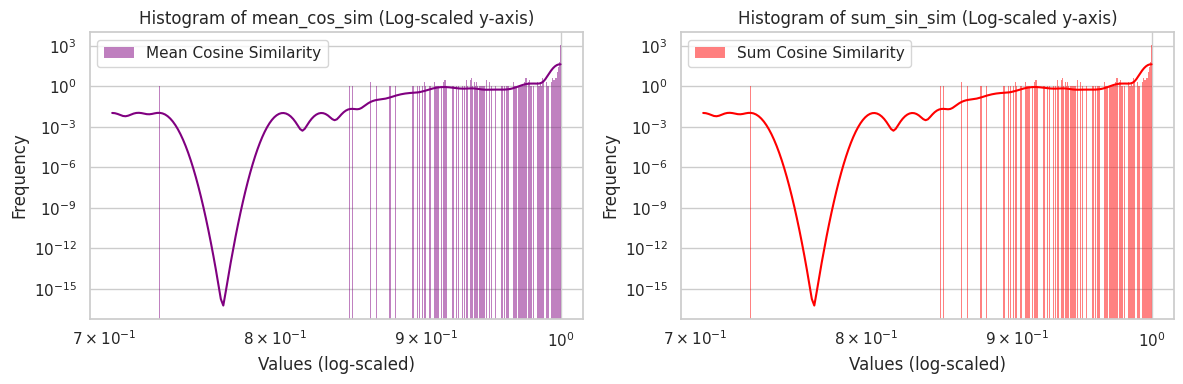

In [73]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
g = sns.histplot(data=rec_df, x='mean_cos_sim', kde=True, color='purple', label='Mean Cosine Similarity', ax=axes[0])
h = sns.histplot(data=rec_df, x='sum_cos_sim', kde=True, color='red', label='Sum Cosine Similarity', ax=axes[1])

axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[0].set_xscale('log')
axes[1].set_xscale('log')

axes[0].set_xlabel('Values (log-scaled)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of mean_cos_sim (Log-scaled y-axis)')
axes[0].legend()

axes[1].set_xlabel('Values (log-scaled)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of sum_sin_sim (Log-scaled y-axis)')
axes[1].legend()

plt.tight_layout()
plt.show()

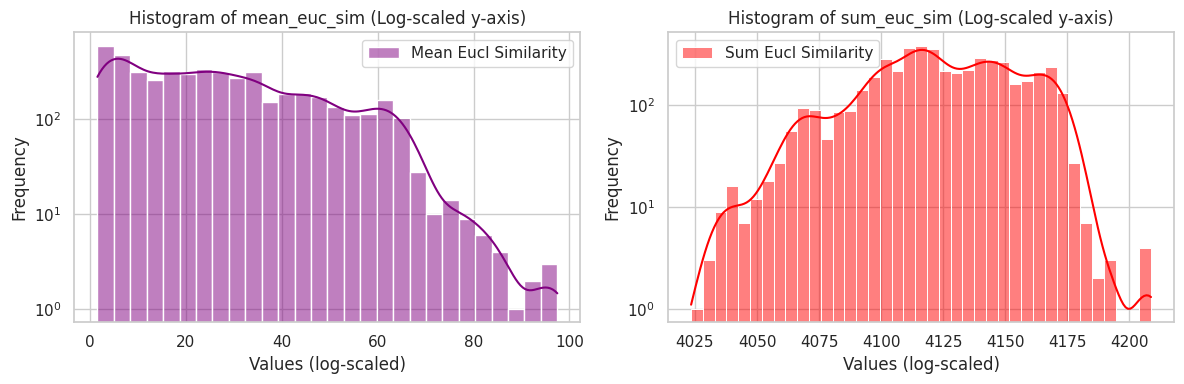

In [74]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
g = sns.histplot(data=rec_df, x='mean_euc_sim', kde=True, color='purple', label='Mean Eucl Similarity', ax=axes[0])
h = sns.histplot(data=rec_df, x='sum_euc_sim', kde=True, color='red', label='Sum Eucl Similarity', ax=axes[1])

axes[0].set_yscale('log')
axes[1].set_yscale('log')


axes[0].set_xlabel('Values (log-scaled)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of mean_euc_sim (Log-scaled y-axis)')
axes[0].legend()

axes[1].set_xlabel('Values (log-scaled)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of sum_euc_sim (Log-scaled y-axis)')
axes[1].legend()

plt.tight_layout()
plt.show()